# Hands written digit reognition

Hand written digits recognition is a classical problem in machine learning. It combines various tasks: data-handling, showing images, maybe resizing images for a better computer vision manipulation if wirking with a model GPU using CNNs, ... . In this notebook, I will cover some aspects of this typical problem using **Machine learning** classification algorithms such as **Logistic regression**, **Suport vector machines**, **Decision trees**, and **Random forests**. 
We will cover some dimentionality reduction techniques to map the huge data in a smaller space conserving the variance of the dataset at at least 80% to ensure some realistic representation of the initial correletaions. we use **Principal component analysis**, and **Linear descriminant analysis** techniques.

***Let's have fun !***

In [1]:
%matplotlib inline

In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we will import the dataset using the pandas library. to do so, we change the actual working directory, to the directory hosting the dataset csv file.

In [3]:
import os

os.chdir(r'C:\Users\moham\Documents\Artificial intelligence & Health\Learning\Images')

In [4]:
# importing the dataset

dataset = pd.read_csv('mnist_train.csv')
dataset_test = pd.read_csv('mnist_test.csv')

In [11]:
%%timeit
    dataset = pd.read_csv('mnist_train.csv')
    dataset_test = pd.read_csv('mnist_test.csv')

9.2 s ± 726 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The dataset contains the images pixels' informations in a form of rows. each row is an image of size (28, 28). we have 60000 images in the training set and 10000 in the test set.

In [5]:
dataset.head(6)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [7]:
dataset.shape

(60000, 785)

In [8]:
len(dataset.index)

60000

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
dataset.drop(['label'], axis= 1).describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


We will now create images using this CSV file. Images will be in form of (**np.array**)  
each line which has (784 colonnes/pixels) is going to ba a matrix using the method **reshape**

In [11]:
n_samples = len(dataset.index) # number of pictures ie the number of lines 

images = np.array(dataset.drop(['label'], axis= 1))
images = np.reshape(images, (n_samples,28, 28))

In [12]:
type(images)

numpy.ndarray

In [13]:
print(images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Example of showing images with the method plt.imshow

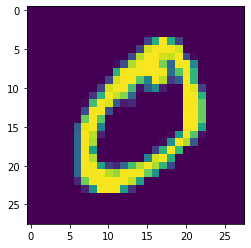

In [14]:
plt.imshow(images[1])

Showing the image with the black and white colors only

Text(0.5, 1.0, 'Label: 0')

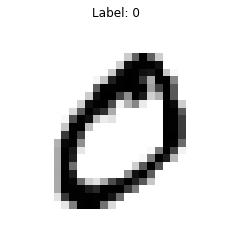

In [15]:
plt.imshow(images[1], cmap="gray_r")
plt.axis('off')
plt.title('Label: %i' % dataset.label[1])

Example of showing the first 100 images of the dataset

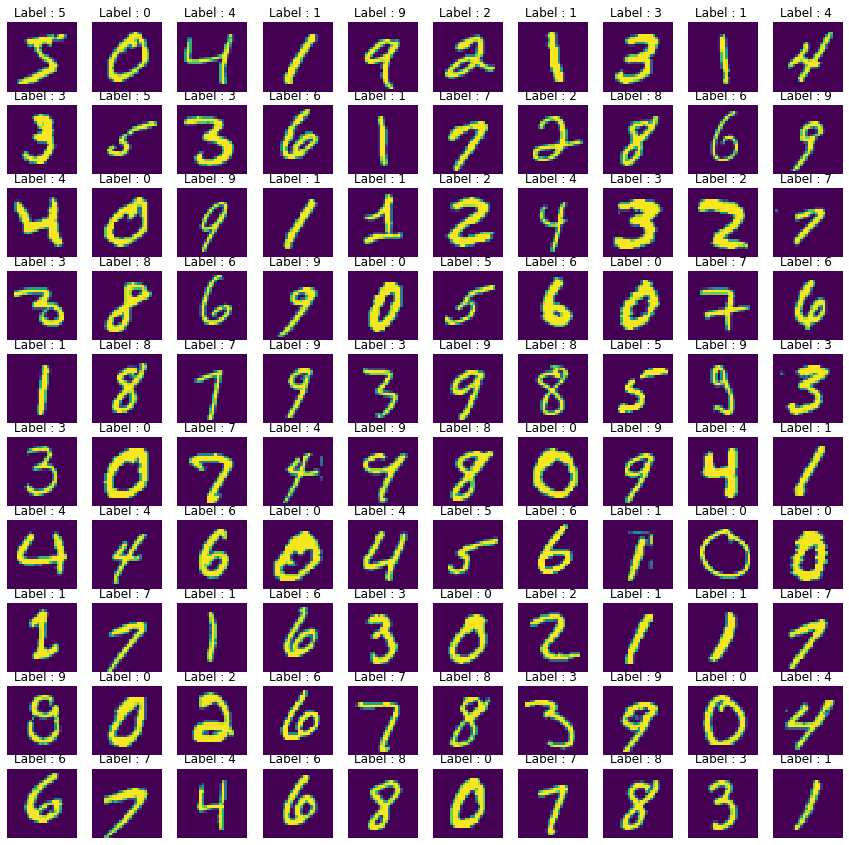

In [16]:
plt.figure(figsize= (15, 15))
for i in range(0, 100, 1):
    plt.subplot(10, 10, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title('Label : %i ' %dataset.label[i])

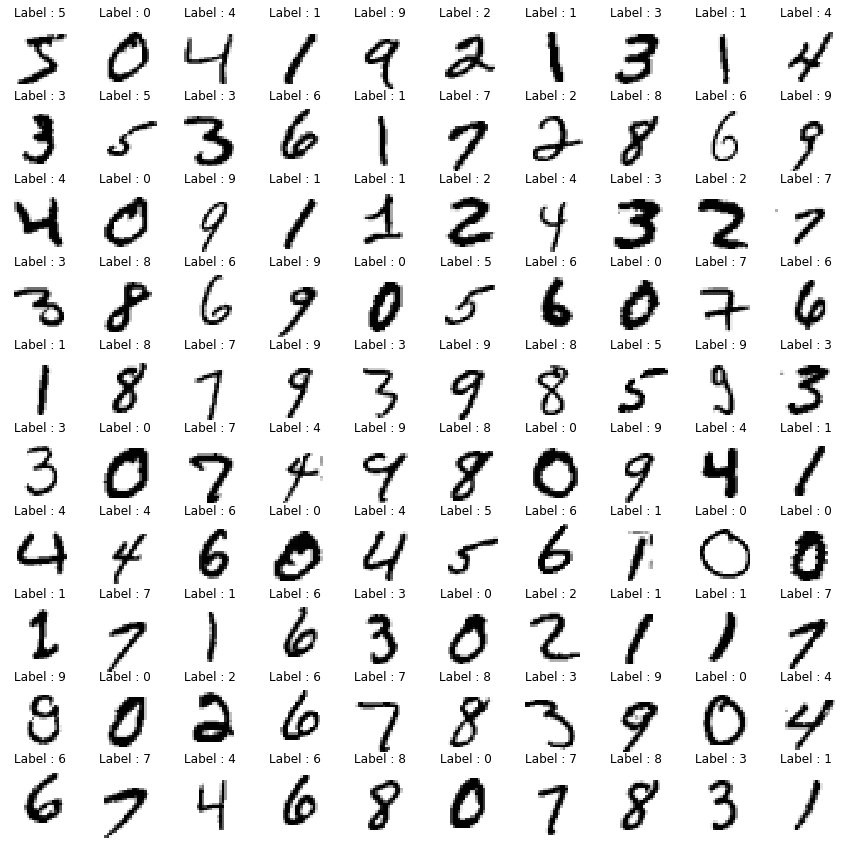

In [17]:
plt.figure(figsize= (15, 15))
for i in range(0, 100, 1):
    plt.subplot(10, 10, i+1)
    plt.imshow(images[i], cmap='gray_r')
    plt.axis('off')
    plt.title('Label : %i ' %dataset.label[i])

for further informations look at : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow

# Applying machine learning techniques to the data training set 

##### Before to start, we'll start by preprocess the data to prepare it for our machine learning algorithms

we'll use the entire data set here, and we will upload another test set of 10000 rows to the test

#### Data preprocessing

In [18]:
X_train = dataset.drop(['label'], axis= 1).values
y_train = dataset['label'].values

In [19]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

#### Scaling the independant variables

In [21]:
X_train= X_train.astype('float32')/255

In [22]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
X_test = dataset_test.drop(['label'], axis= 1).values
X_test = X_test.astype('float32')/255

In [24]:
y_test = dataset_test['label'].values

### Support Vectors Machine Classifier

for further reading : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [25]:
from sklearn.svm import SVC

In [26]:
svm_classifier = SVC(C= 1.0, kernel='rbf', random_state= 0, gamma= 'auto')
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
# the support vectors
svm_classifier.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
y_pred_svm = svm_classifier.predict(X_test)

In [29]:
svm_classifier.dual_coef_

array([[ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 1.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       ...,
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 1.,  1.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -0., -0., -0.]])

In [30]:
y_pred_svm

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[ 967,    0,    2,    0,    0,    5,    4,    1,    1,    0],
       [   0, 1121,    2,    2,    0,    1,    4,    1,    4,    0],
       [   9,    1,  961,    9,   10,    1,   13,    9,   17,    2],
       [   1,    1,   15,  951,    1,   15,    1,   10,   11,    4],
       [   1,    1,    7,    0,  938,    0,    7,    2,    2,   24],
       [   7,    4,    5,   30,    7,  810,   12,    2,   10,    5],
       [   9,    3,    4,    1,    5,    9,  926,    0,    1,    0],
       [   2,   13,   22,    5,    8,    1,    0,  956,    3,   18],
       [   4,    7,    7,   14,    8,   23,   10,    6,  892,    3],
       [   8,    7,    0,   12,   31,    6,    1,   13,    7,  924]],
      dtype=int64)

In [33]:
accuracy_score(y_test, y_pred_svm)

0.9446

###### we've got an acucracy of 94%

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred_lr = classifier.predict(X_test)

In [36]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[ 960,    0,    1,    2,    0,    5,    6,    3,    1,    2],
       [   0, 1112,    3,    1,    0,    1,    5,    1,   12,    0],
       [   8,    8,  920,   20,    9,    5,   10,   11,   37,    4],
       [   4,    0,   17,  919,    2,   22,    4,   12,   21,    9],
       [   1,    2,    5,    3,  914,    0,   10,    2,    7,   38],
       [  10,    2,    0,   41,   10,  770,   17,    7,   28,    7],
       [   9,    3,    7,    2,    6,   20,  907,    1,    3,    0],
       [   2,    7,   22,    5,    8,    1,    1,  950,    5,   27],
       [  10,   14,    5,   21,   14,   27,    7,   11,  853,   12],
       [   8,    8,    2,   13,   31,   14,    0,   24,   12,  897]],
      dtype=int64)

In [37]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.9202

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors= 9, weights= 'uniform', metric= 'minkowski', p= 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [39]:
y_pred_knn = knn_classifier.predict(X_test)

In [40]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  14,   13,  978,    3,    1,    0,    2,   16,    5,    0],
       [   0,    3,    1,  976,    1,   11,    1,    8,    4,    5],
       [   2,   11,    0,    0,  936,    0,    5,    1,    1,   26],
       [   5,    0,    0,    8,    2,  867,    4,    1,    1,    4],
       [   6,    4,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   27,    3,    0,    1,    0,    0,  986,    0,   11],
       [   7,    4,    4,   12,    6,   13,    3,    8,  911,    6],
       [   6,    7,    2,   11,   10,    3,    1,    9,    2,  958]],
      dtype=int64)

In [41]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9659

## Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred_nb = nb_classifier.predict(X_test)

In [44]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [45]:
cm_nb

array([[ 870,    0,    3,    5,    2,    5,   31,    1,   35,   28],
       [   0, 1079,    2,    1,    0,    0,   10,    0,   38,    5],
       [  79,   25,  266,   91,    5,    2,  269,    4,  271,   20],
       [  32,   39,    6,  353,    2,    3,   51,    8,  409,  107],
       [  19,    2,    5,    4,  168,    7,   63,    7,  210,  497],
       [  71,   25,    1,   20,    3,   44,   40,    2,  586,  100],
       [  12,   12,    3,    1,    1,    7,  895,    0,   26,    1],
       [   0,   15,    2,   10,    5,    1,    5,  280,   39,  671],
       [  13,   72,    3,    7,    3,   11,   12,    4,  648,  201],
       [   5,    7,    3,    6,    1,    0,    1,   13,   18,  955]],
      dtype=int64)

In [46]:
accuracy_score(y_test, y_pred_nb)

0.5558

###### With an accuracy of 55%, Naive Bayes classifier in this case is much poor !

# Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini', splitter='best', random_state= 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [48]:
dt_classifier.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')>

In [49]:
y_pred_dt = dt_classifier.predict(X_test)

In [50]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[ 915,    0,    4,    8,    5,   11,   14,    4,    8,   11],
       [   0, 1090,    8,   11,    1,    6,    8,    1,    9,    1],
       [  15,    7,  879,   33,   14,    9,   11,   24,   30,   10],
       [  11,    5,   29,  865,    7,   37,    4,    9,   23,   20],
       [   5,    2,    7,    5,  865,    8,   15,   11,   21,   43],
       [  13,    7,    3,   50,    6,  751,   23,    6,   21,   12],
       [  16,    3,   15,   10,   22,   20,  841,    2,   25,    4],
       [   2,   12,   26,   13,    6,    6,    4,  929,    9,   21],
       [  10,    7,   29,   41,   17,   27,   16,   10,  788,   29],
       [  14,    2,   11,   20,   41,    8,    9,   20,   28,  856]],
      dtype=int64)

In [51]:
accuracy_score(y_test, y_pred_dt)

0.8779

##### with only one tree classifier we've got an acucracy of 88%, we'll use now the random forest classifier !

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators= 250, criterion='gini', random_state= 0, n_jobs= -1)

In [53]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
y_pred_rf = rf_classifier.predict(X_test)

In [55]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[ 969,    0,    1,    0,    0,    2,    4,    1,    3,    0],
       [   0, 1122,    3,    3,    1,    2,    2,    1,    1,    0],
       [   6,    0,  999,    7,    3,    0,    3,    9,    5,    0],
       [   1,    0,    9,  975,    0,    7,    0,    8,    8,    2],
       [   1,    0,    1,    0,  954,    0,    6,    1,    2,   17],
       [   3,    0,    0,   12,    4,  858,    7,    1,    5,    2],
       [   7,    3,    0,    0,    2,    3,  940,    0,    3,    0],
       [   1,    4,   19,    0,    0,    0,    0,  990,    4,   10],
       [   4,    0,    4,    8,    3,    8,    3,    4,  930,   10],
       [   8,    5,    1,    9,   10,    4,    1,    4,    3,  964]],
      dtype=int64)

In [56]:
accuracy_score(y_test, y_pred_rf)

0.9701

###### The best accuracy we've got here is 97%.

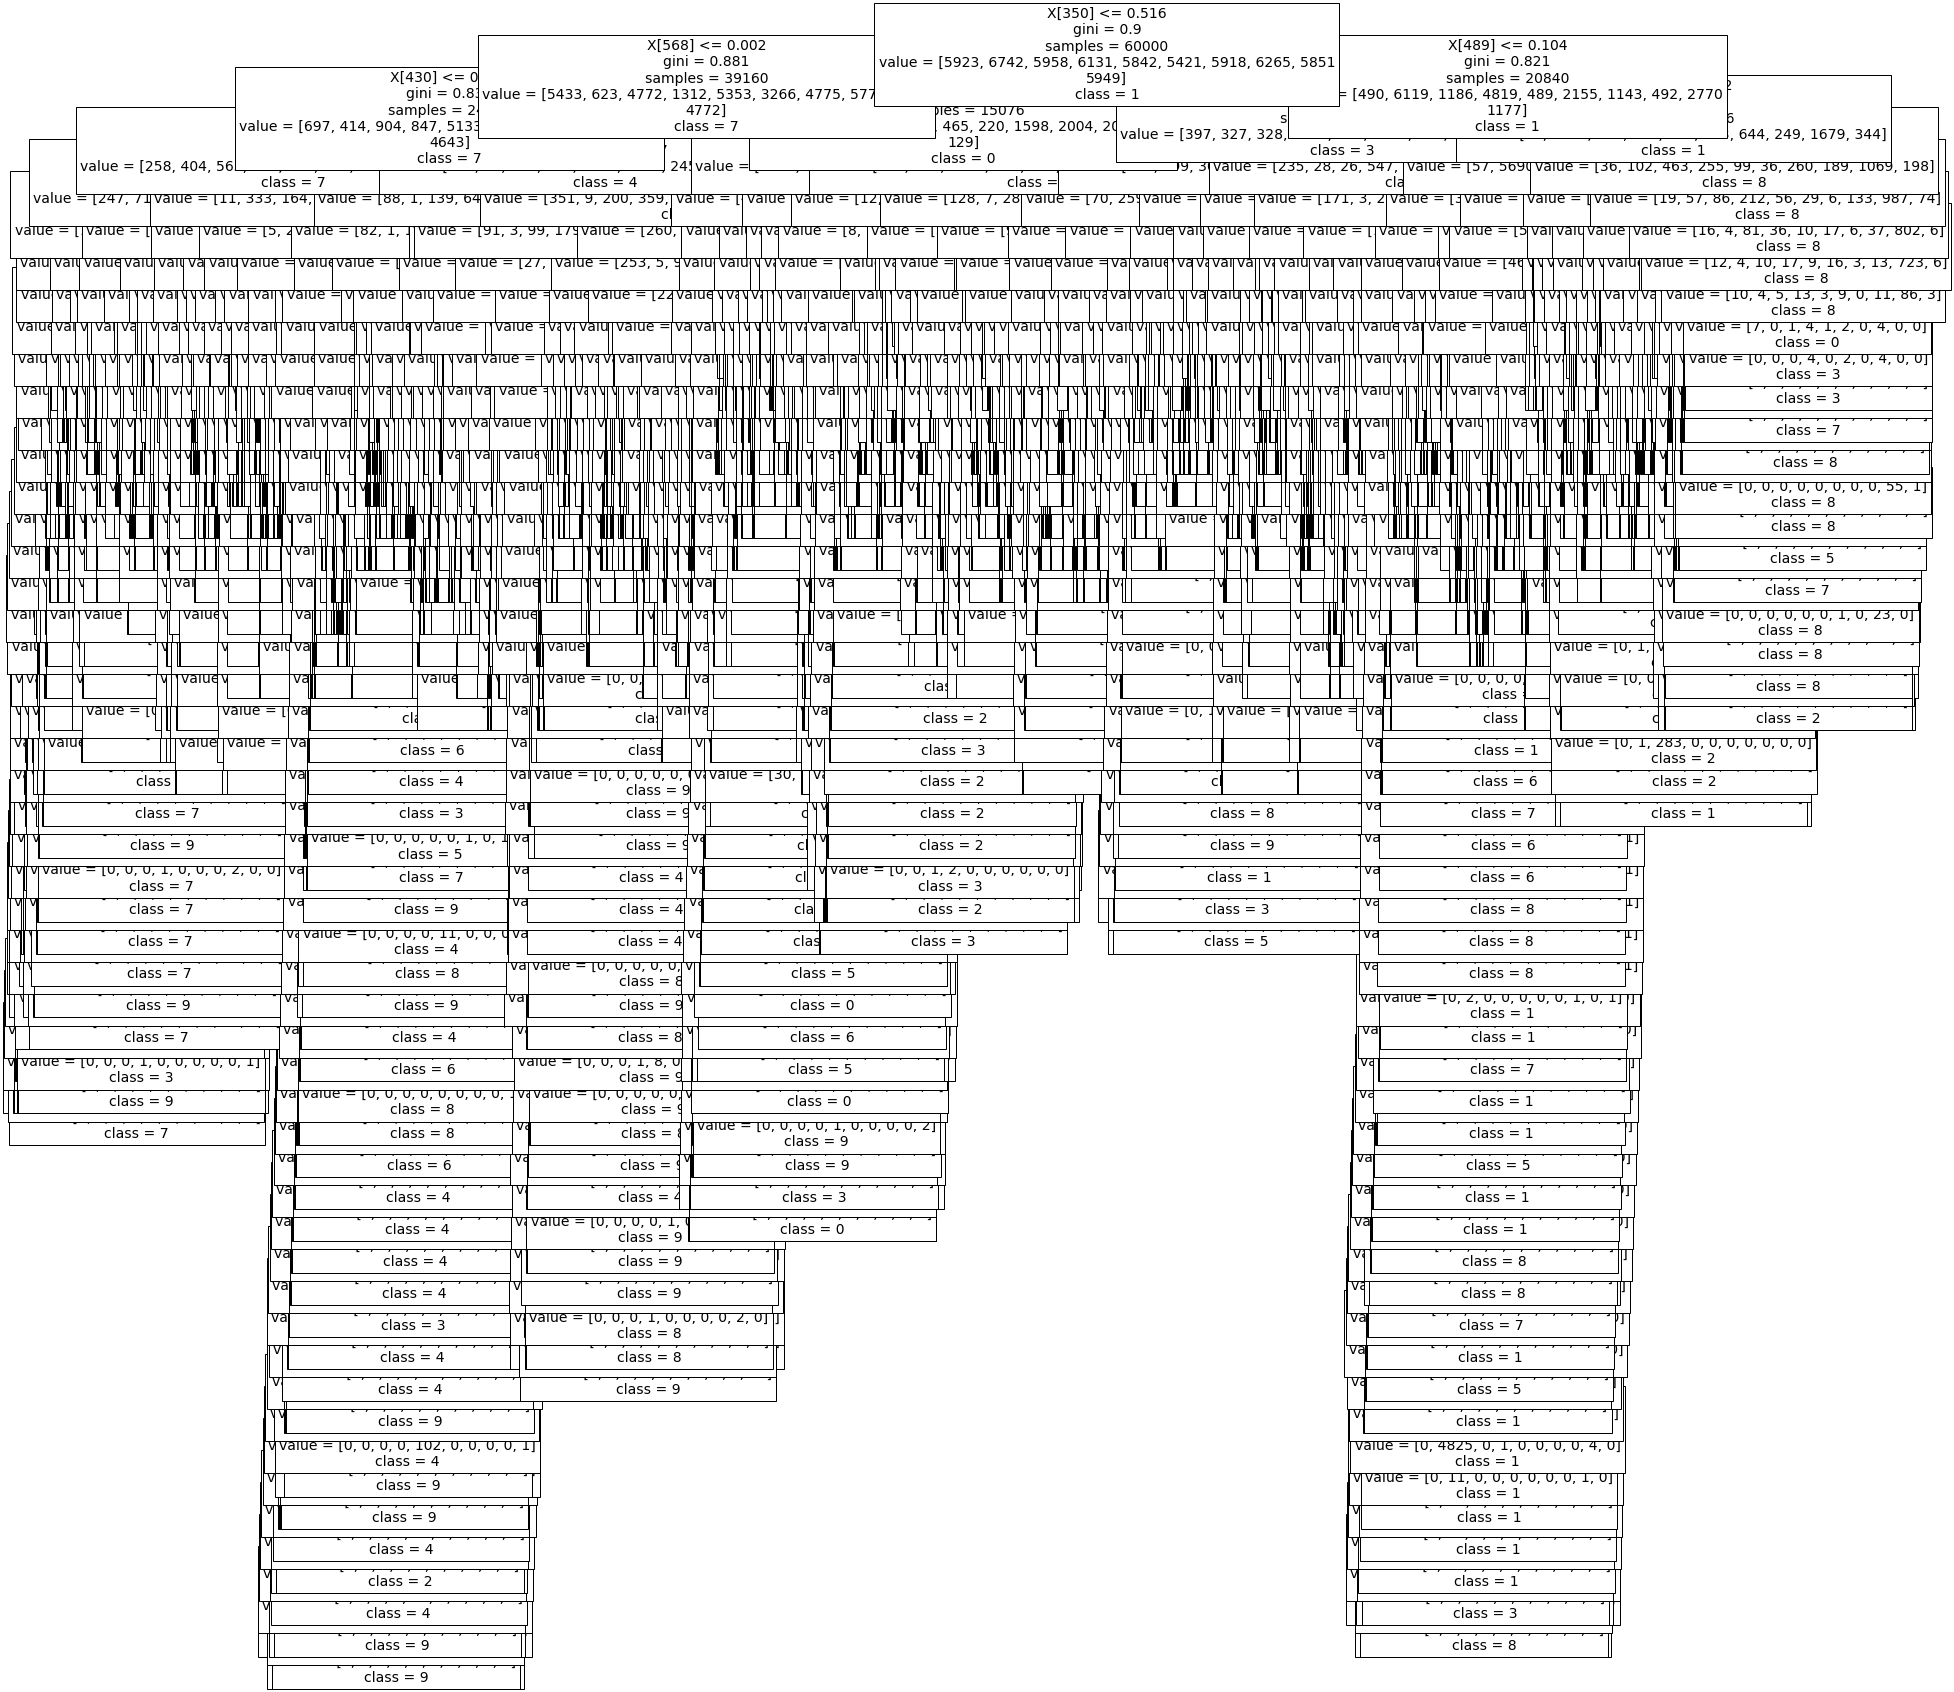

In [61]:
from sklearn import tree
plt.figure(figsize=(30,30))
fig = tree.plot_tree(dt_classifier, class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=14)

The desision tree above shows how it's difficult to actually write an algorithm with if/else statments to recognize handwritten digits.

# Dimentionality reduction techniques

In [62]:
X_train.shape

(60000, 784)

In [63]:
y_train.shape

(60000,)

In [64]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

###### We will use some Dimentionality Reduction techniques in order to extract the mean components of the trainingset, because implementing a neural network with an input dim of 784 neurons seems to be compulsory intensive. So we will reduce first the dimentionality of our dataset using let's try the Principal Component Analysis technique.

# Pricipal component analysis

In [65]:
# Dimentionality reduction 

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [66]:
explained_variance[explained_variance>= 0.005]

array([0.09704707, 0.07095943, 0.06169203, 0.05389408, 0.04868803,
       0.04312216, 0.03271934, 0.0288389 , 0.02762022, 0.02356997,
       0.02109188, 0.02022984, 0.01715809, 0.01692112, 0.01578638,
       0.01482951, 0.01324557, 0.012769  , 0.01187259, 0.01152684,
       0.01066162, 0.0100671 , 0.0095357 , 0.00912541, 0.00883405,
       0.00839317, 0.00812577, 0.00786365, 0.0074473 , 0.00690857,
       0.00658091, 0.00648149, 0.00602614, 0.00586581, 0.0057002 ,
       0.00543629, 0.00505783], dtype=float32)

In [67]:
explained_variance[explained_variance>= 0.005].shape[0]

37

In [68]:
explained_variance[explained_variance>= 0.003]

array([0.09704707, 0.07095943, 0.06169203, 0.05389408, 0.04868803,
       0.04312216, 0.03271934, 0.0288389 , 0.02762022, 0.02356997,
       0.02109188, 0.02022984, 0.01715809, 0.01692112, 0.01578638,
       0.01482951, 0.01324557, 0.012769  , 0.01187259, 0.01152684,
       0.01066162, 0.0100671 , 0.0095357 , 0.00912541, 0.00883405,
       0.00839317, 0.00812577, 0.00786365, 0.0074473 , 0.00690857,
       0.00658091, 0.00648149, 0.00602614, 0.00586581, 0.0057002 ,
       0.00543629, 0.00505783, 0.00487857, 0.00481429, 0.00472263,
       0.00456746, 0.00444836, 0.00418501, 0.00398215, 0.00384973,
       0.00375102, 0.00362009, 0.00351591, 0.00340056, 0.00321873,
       0.00319016, 0.00312806], dtype=float32)

In [69]:
explained_variance[explained_variance>= 0.003].shape[0]

52

In [70]:
explained_variance[explained_variance>= 0.0023]

array([0.09704707, 0.07095943, 0.06169203, 0.05389408, 0.04868803,
       0.04312216, 0.03271934, 0.0288389 , 0.02762022, 0.02356997,
       0.02109188, 0.02022984, 0.01715809, 0.01692112, 0.01578638,
       0.01482951, 0.01324557, 0.012769  , 0.01187259, 0.01152684,
       0.01066162, 0.0100671 , 0.0095357 , 0.00912541, 0.00883405,
       0.00839317, 0.00812577, 0.00786365, 0.0074473 , 0.00690857,
       0.00658091, 0.00648149, 0.00602614, 0.00586581, 0.0057002 ,
       0.00543629, 0.00505783, 0.00487857, 0.00481429, 0.00472263,
       0.00456746, 0.00444836, 0.00418501, 0.00398215, 0.00384973,
       0.00375102, 0.00362009, 0.00351591, 0.00340056, 0.00321873,
       0.00319016, 0.00312806, 0.00295982, 0.00288954, 0.00284131,
       0.00271435, 0.00269521, 0.00258473, 0.0025377 , 0.0024478 ,
       0.00240506, 0.00239261, 0.00230407], dtype=float32)

In [71]:
explained_variance[explained_variance>= 0.0022].shape[0]

64

In [72]:
sum(explained_variance[explained_variance>= 0.0022])

0.8619533232413232

We can see that with only 64 variables in the input instead of 784, we can preserve 86% of data's variance, so this approach could have a great relevance.

In [73]:
# Dimentionality Reduction

from sklearn.decomposition import PCA
pca = PCA(n_components= 64)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced  = pca.transform(X_test)

In [74]:
X_train_reduced.shape

(60000, 64)

In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

# SVM with reduced training dataset

In [76]:
from sklearn.svm import SVC

svc_classifier = SVC(C= 1.0, kernel= 'rbf', gamma='auto', random_state= 0, max_iter= -1)
svc_classifier.fit(X_train_reduced, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
y_pred_svm = svc_classifier.predict(X_test_reduced)

In [78]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[ 973,    0,    2,    0,    0,    2,    0,    1,    2,    0],
       [   0, 1129,    2,    1,    0,    1,    1,    0,    1,    0],
       [   5,    0, 1009,    2,    1,    0,    2,    9,    4,    0],
       [   0,    0,    1,  995,    0,    4,    0,    6,    3,    1],
       [   0,    0,    3,    0,  962,    0,    4,    0,    1,   12],
       [   2,    0,    0,    7,    0,  877,    3,    0,    2,    1],
       [   6,    2,    0,    0,    2,    4,  943,    0,    1,    0],
       [   0,    9,   10,    2,    2,    0,    0,  997,    0,    8],
       [   2,    0,    2,    3,    4,    2,    2,    2,  955,    2],
       [   3,    4,    1,    7,   11,    1,    1,    5,    3,  973]],
      dtype=int64)

In [79]:
accuracy_svc = accuracy_score(y_test, y_pred_svm)
accuracy_svc

0.9813

We've got a better accuracy with dimentionality reduction technique

# Naive Bayes with the new reduced training set

In [80]:
# Naive Bayes with Dimentionality reduction 

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_reduced, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
y_pred_nb = nb_classifier.predict(X_test_reduced)

In [82]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[ 929,    0,   13,    3,    0,   21,    9,    3,    1,    1],
       [   0, 1068,   19,    6,    1,   12,    8,    1,   19,    1],
       [  15,    1,  894,   22,   11,    9,    8,   19,   50,    3],
       [   4,    0,   23,  876,    3,   39,    3,   16,   31,   15],
       [   1,    1,   18,    1,  861,    7,   13,    2,    5,   73],
       [   6,    1,    5,   60,    6,  761,   11,    7,   30,    5],
       [   6,    2,   13,    2,   14,   40,  880,    0,    1,    0],
       [   3,   23,   36,    2,   26,   12,    1,  866,   12,   47],
       [   9,    1,   15,   34,    9,   42,    5,    9,  841,    9],
       [  11,    2,   24,    9,   61,   20,    1,   21,   13,  847]],
      dtype=int64)

In [83]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.8823

The accuracy has increased for the same algorithm from 55% to 88% after applying Dimentionality Reduction to the dataset. Let's notice that the variance is still 88% representing the original dataset, ie the dataset reduced to 64 columns represents well the original dataset.

# Decision tree with new reduced training set

In [84]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini', splitter='best', random_state= 0)
dt_classifier.fit(X_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [85]:
y_pred_dt = dt_classifier.predict(X_test_reduced)

In [86]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [87]:
cm_dt

array([[ 879,    0,   15,    7,    4,   26,   26,    6,   10,    7],
       [   0, 1098,    4,    6,    6,    4,    3,    4,    6,    4],
       [  24,   14,  850,   30,   12,   18,   14,   21,   34,   15],
       [   9,    7,   17,  817,    7,   53,    7,   11,   54,   28],
       [   6,    4,   15,    4,  816,   15,   18,   24,   13,   67],
       [  15,    5,    8,   58,   18,  688,   17,   13,   55,   15],
       [  30,    5,   11,    6,   14,   23,  852,    6,    6,    5],
       [   9,    9,   28,   12,   17,    6,    3,  881,   15,   48],
       [  21,    2,   34,   46,   17,   49,   12,   21,  744,   28],
       [  10,    4,    6,   27,   82,   22,    5,   41,   26,  786]],
      dtype=int64)

In [88]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.8411

For the decision tree algorithm, the accuracy has decreased infortunately either by using **entropy** or **gini** as criterion. In fact, the use of dimentionality reduction is based on extracting the features representing the best the dataset. for the devision tree algorithm, the use of entropy leads to decreasing the accuracy because in some sort we have lost some  informations about the dataset while projecting it into a smaller dimention space.

# Random forest classifier with new reduced training set

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators= 500, criterion='entropy', random_state= 0, n_jobs= -1)
rf_classifier.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
y_pred_rf = rf_classifier.predict(X_test_reduced)

In [91]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[ 964,    0,    3,    0,    1,    4,    6,    1,    1,    0],
       [   0, 1122,    1,    5,    0,    1,    4,    1,    1,    0],
       [  12,    0,  974,   10,    6,    1,    3,    8,   17,    1],
       [   1,    0,    9,  952,    0,   14,    2,   12,   17,    3],
       [   1,    1,    4,    0,  933,    3,    9,    3,    3,   25],
       [   3,    0,    1,   14,    5,  849,   12,    1,    5,    2],
       [   6,    3,    1,    0,    4,    6,  937,    0,    1,    0],
       [   1,    6,   19,    2,    5,    0,    0,  972,    2,   21],
       [   8,    0,    7,   14,    7,   18,    5,    7,  901,    7],
       [   4,    6,    2,   11,   25,    4,    0,   10,   10,  937]],
      dtype=int64)

In [93]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9541

# Logistic Regression with new reduced training set

In [94]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_reduced, y_train)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred_lr = classifier.predict(X_test_reduced)

In [96]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[ 959,    0,    1,    2,    0,    5,    8,    1,    3,    1],
       [   0, 1106,    1,    3,    0,    3,    4,    2,   16,    0],
       [   8,    6,  911,   14,   12,    4,   13,   18,   38,    8],
       [   4,    1,   20,  913,    2,   24,    5,   13,   20,    8],
       [   3,    2,    6,    1,  909,    1,    9,    2,    7,   42],
       [  11,    2,    9,   50,   15,  736,   19,    8,   31,   11],
       [  11,    3,    6,    1,   10,   12,  909,    3,    3,    0],
       [   3,    9,   25,    4,    8,    3,    0,  943,    1,   32],
       [  11,   13,    7,   19,   15,   26,   15,   13,  846,    9],
       [  10,   10,    5,   14,   49,   10,    0,   29,   10,  872]],
      dtype=int64)

In [97]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.9104

# KNN with new reduced dataset

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors= 9, weights= 'uniform', metric= 'minkowski', p= 2, n_jobs= -1)
knn_classifier.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='uniform')

In [99]:
y_pred_knn = knn_classifier.predict(X_test_reduced)

In [100]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[ 972,    1,    1,    0,    0,    1,    4,    1,    0,    0],
       [   0, 1131,    2,    0,    0,    0,    1,    0,    0,    1],
       [   8,    2, 1000,    0,    1,    0,    2,   16,    3,    0],
       [   0,    1,    1,  978,    1,   11,    0,    6,    7,    5],
       [   1,    5,    0,    0,  952,    0,    5,    1,    0,   18],
       [   3,    0,    0,    8,    1,  869,    6,    1,    1,    3],
       [   6,    5,    0,    0,    3,    1,  943,    0,    0,    0],
       [   0,   20,    4,    0,    2,    0,    0,  994,    0,    8],
       [   4,    0,    3,   11,    5,    7,    2,    6,  932,    4],
       [   3,    6,    3,    5,    9,    5,    1,    6,    2,  969]],
      dtype=int64)

In [101]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.974

KNN has improved with dimentionality reduction

# Linear descriminant analysis

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)
X_train_reduced = lda.fit_transform(X_train, y_train)
X_test_reduced = lda.transform(X_test)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [103]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025, 0.04973746, 0.03429077, 0.0267832 ])

In [104]:
sum(lda.explained_variance_ratio_)

0.9999999999999999

we will try to find the number of componenets, leading to a variane ratio larger than 90%.

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=6)
X_train_reduced = lda.fit_transform(X_train, y_train)
X_test_reduced = lda.transform(X_test)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [106]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025])

In [107]:
sum(lda.explained_variance_ratio_)

0.8891885730050789

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=7)
X_train_reduced = lda.fit_transform(X_train, y_train)
X_test_reduced = lda.transform(X_test)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [109]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025, 0.04973746])

In [110]:
sum(lda.explained_variance_ratio_)

0.9389260322332224

In [111]:
X_train_reduced.shape

(60000, 7)

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None) # which is min(n_features, n_samples) = 9 
X_train_reduced = lda.fit_transform(X_train, y_train)
X_test_reduced = lda.transform(X_test)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [113]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995, 0.17849695, 0.10652571, 0.09406712,
       0.06906025, 0.04973746, 0.03429077, 0.0267832 ])

In [114]:
X_train_reduced.shape

(60000, 9)

##### With the new reduced dataset, we can preserve the mean features of the original dataset since the variance ratio is about 93%.

# Previous models with LDA

# SVM with LDA

In [115]:
from sklearn.svm import SVC

svc_classifier = SVC(C= 0.91, kernel= 'rbf', gamma='auto', random_state= 0, max_iter= -1)
svc_classifier.fit(X_train_reduced, y_train)

SVC(C=0.91, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [116]:
y_pred_svm = svc_classifier.predict(X_test_reduced)

In [117]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[ 961,    0,    2,    3,    1,    3,    5,    3,    2,    0],
       [   0, 1113,    3,    5,    1,    3,    1,    0,    9,    0],
       [   7,    6,  951,   15,    9,    4,    8,   15,   16,    1],
       [   2,    3,   21,  913,    0,   30,    0,   10,   25,    6],
       [   0,    0,    6,    0,  923,    0,   12,    5,    7,   29],
       [   7,    1,    4,   38,    6,  791,    5,   11,   28,    1],
       [   9,    3,    9,    1,    8,   19,  906,    0,    3,    0],
       [   2,   11,   20,    8,    4,    1,    0,  946,    4,   32],
       [   7,   14,    7,   28,   13,   27,   10,   10,  852,    6],
       [  10,    4,    2,   11,   42,    6,    0,   21,   11,  902]],
      dtype=int64)

In [118]:
accuracy_svc = accuracy_score(y_test, y_pred_svm)
accuracy_svc

0.9258

# Naive Bayes 

In [119]:
# Naive Bayes with Dimentionality reduction 

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_reduced, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
y_pred_nb = nb_classifier.predict(X_test_reduced)

In [121]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

array([[ 936,    0,    5,    3,    0,   11,   16,    2,    7,    0],
       [   0, 1061,   11,    4,    1,    1,    4,    0,   53,    0],
       [   9,    5,  874,   29,   15,    5,   28,   10,   53,    4],
       [   3,    4,   28,  874,    1,   38,    4,   17,   31,   10],
       [   0,    5,   10,    2,  890,    4,    9,    2,   14,   46],
       [   6,    1,   10,   41,   10,  735,   16,   17,   48,    8],
       [  15,    2,   22,    0,   14,   27,  865,    0,   13,    0],
       [   3,   15,   20,   14,   13,    2,    0,  883,    3,   75],
       [   4,   16,    9,   24,   16,   54,   11,   14,  814,   12],
       [   8,    4,    2,   13,   56,    6,    0,   35,   18,  867]],
      dtype=int64)

In [122]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.8799

# XGBOOST algorithms

#### ipython documentation using Tab Completion

Init signature:
XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    **kwargs,
)
Docstring:
Implementation of the scikit-learn API for XGBoost classification.

Parameters
----------
max_depth : int
    Maximum tree depth for base learners.
learning_rate : float
    Boosting learning rate (xgb's "eta")
n_estimators : int
    Number of trees to fit.
verbosity : int
    The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
silent : boolean
    Whether to print messages while running boosting. Deprecated. Use verbosity instead.
objective : string or callable
    Specify the learning task and the corresponding learning objective or
    a custom objective function to be used (see note below).
booster: string
    Specify which booster to use: gbtree, gblinear or dart.
nthread : int
    Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
n_jobs : int
    Number of parallel threads used to run xgboost.  (replaces ``nthread``)
gamma : float
    Minimum loss reduction required to make a further partition on a leaf node of the tree.
min_child_weight : int
    Minimum sum of instance weight(hessian) needed in a child.
max_delta_step : int
    Maximum delta step we allow each tree's weight estimation to be.
subsample : float
    Subsample ratio of the training instance.
colsample_bytree : float
    Subsample ratio of columns when constructing each tree.
colsample_bylevel : float
    Subsample ratio of columns for each level.
colsample_bynode : float
    Subsample ratio of columns for each split.
reg_alpha : float (xgb's alpha)
    L1 regularization term on weights
reg_lambda : float (xgb's lambda)
    L2 regularization term on weights
scale_pos_weight : float
    Balancing of positive and negative weights.
base_score:
    The initial prediction score of all instances, global bias.
seed : int
    Random number seed.  (Deprecated, please use random_state)
random_state : int
    Random number seed.  (replaces seed)
missing : float, optional
    Value in the data which needs to be present as a missing value. If
    None, defaults to np.nan.
importance_type: string, default "gain"
    The feature importance type for the feature_importances_ property: either "gain",
    "weight", "cover", "total_gain" or "total_cover".
\*\*kwargs : dict, optional
    Keyword arguments for XGBoost Booster object.  Full documentation of parameters can
    be found here: https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst.
    Attempting to set a parameter via the constructor args and \*\*kwargs dict simultaneously
    will result in a TypeError.

    .. note:: \*\*kwargs unsupported by scikit-learn

        \*\*kwargs is unsupported by scikit-learn.  We do not guarantee that parameters
        passed via this argument will interact properly with scikit-learn.

In [123]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(n_estimators= 100, n_jobs= -1)
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [124]:
y_pred_xgb = classifier_xgb.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

array([[ 967,    0,    1,    0,    0,    3,    3,    1,    4,    1],
       [   0, 1117,    4,    2,    0,    1,    4,    1,    6,    0],
       [  11,    1,  961,   15,   10,    0,    6,   12,   13,    3],
       [   5,    0,   20,  927,    2,   16,    4,   10,   15,   11],
       [   1,    1,    2,    0,  908,    2,    9,    2,    5,   52],
       [   7,    2,    1,   21,    3,  815,    9,    5,   18,   11],
       [  10,    4,    0,    0,    7,   13,  911,    2,   11,    0],
       [   4,    7,   25,    7,    5,    2,    0,  948,    4,   26],
       [   5,    4,    5,   11,    9,    6,   14,    6,  895,   19],
       [   8,    8,    2,   12,   30,    5,    1,   13,   11,  919]],
      dtype=int64)

In [126]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9368

In [131]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.93      0.92      0.93       982
           5       0.94      0.91      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.92      0.92       974
           9       0.88      0.91      0.90      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# FIN